In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
def hrf(t):
    "A hemodynamic response function"
    return t ** 8.6 * np.exp(-t / 0.547)

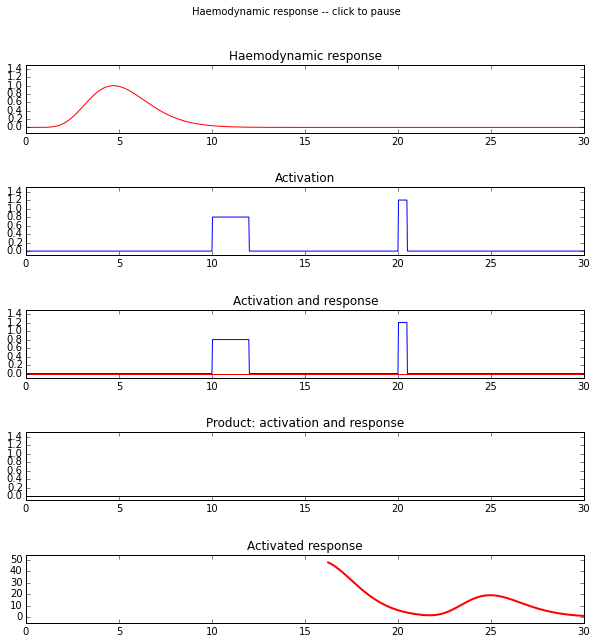

In [12]:
T = 1000
t = np.linspace(0, 30, T)

activation = np.zeros_like(t)
activation[np.where((t > 10) & (t < 12))] = 0.8
activation[np.where((t > 20) & (t < 20.5))] = 1.2

H = hrf(t)
H = H / H.max()
    
response = np.convolve(activation, H)[:T]

@interact(frame=(0, 2 * T))
def plot_hrf(frame=0):
    fig, axes = plt.subplots(5, 1, figsize=(10, 10))
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle('Haemodynamic response -- click to pause')

    axes[0].plot(t, H, color='red')
    axes[0].set_title('Haemodynamic response')
    axes[0].set_ylim(-0.13, 1.5)

    axes[1].plot(t, activation, color='blue')
    axes[1].set_ylim(-0.1, 1.5)
    axes[1].set_title('Activation')
    time_dot, = axes[1].plot([], [], linestyle='none', marker='o', color='r')

    axes[2].plot(t, activation, color='blue')
    axes[2].set_ylim(-0.1, 1.5)
    axes[2].set_title('Activation and response')
    moving_hrf, = axes[2].plot([], [], color='red')

    moving_product, = axes[3].plot([], [], color='black')
    axes[3].set_xlim(t[0], t[-1])
    axes[3].set_ylim(-0.1, 1.5)
    axes[3].set_title('Product: activation and response')

    moving_response, = axes[4].plot([], [], color='red', linewidth=2)
    axes[4].set_xlim(t[0], t[-1])
    axes[4].set_ylim(-5, np.max(response) * 1.1)
    axes[4].set_title('Activated response')

    if frame < T:
        t_now = t[frame]
        time_dot.set_data((t_now, activation[frame]))
    else:
        time_dot.set_data([], [])

    if frame > 0:
        window_t0 = max(0, frame - T)

        H_shifted = np.zeros_like(t)
        H_shifted[window_t0:frame] = H[window_t0:frame][::-1]

        moving_response.set_data(t[window_t0:frame], response[window_t0:frame])
        moving_hrf.set_data(t, H_shifted)

        moving_product.set_data(t, H_shifted * activation)